#HW12 - Mass Spectroscopy

In [3]:
# imports
from IPython.html.widgets import interact, interactive
from IPython.display import display
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d, Axes3D 
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = [9, 6]
matplotlib.rcParams['font.size'] = 11
import numpy as np

:0: FutureWarning: IPython widgets are experimental and may change in the future.


In [4]:
# interactive plotting code
def draw(i=0):
    fig = plt.figure(figsize=[8, 8])
    gs = matplotlib.gridspec.GridSpec(2, 2, hspace=0.05, wspace=0.05)
    # x-y plot
    ax = plt.subplot(gs[0, 0])
    plt.plot(p[0], p[1], color='k', alpha=0.3)
    plt.scatter(p[0, i], p[1, i])
    plt.xlim(-plot_limit, plot_limit)
    plt.ylim(-plot_limit, plot_limit)
    plt.ylabel('Y')
    plt.setp(ax.get_xticklabels(), visible=False)
    plt.grid()
    # 3D
    ax = plt.subplot(gs[1], projection='3d')
    ax.plot(p[0], p[1], p[2], color='k', alpha=0.3)
    ax.scatter(p[0, i], p[1, i], p[2, i])
    ax.set_xlim(-plot_limit, plot_limit)
    ax.set_ylim(-plot_limit, plot_limit)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('t')
    plt.setp(ax.get_xticklabels(), visible=False)
    plt.setp(ax.get_yticklabels(), visible=False)
    plt.setp(ax.get_zticklabels(), visible=False)
    plt.suptitle(str(np.around(t[i]*1e6, 3))+' us')
    # x-t plot
    ax = plt.subplot(gs[1, 0])
    plt.plot(p[0], t, color='k', alpha=0.3)
    plt.scatter(p[0, i], t[i])
    plt.xlim(-plot_limit, plot_limit)
    plt.ylim(t.min(), t.max())
    plt.xlabel('X')
    plt.ylabel('t')
    plt.xticks(rotation=45)
    plt.grid()
    # y-t plot
    ax = plt.subplot(gs[1, 1])
    plt.plot(p[1], t, color='k', alpha=0.3)
    plt.scatter(p[1, i], t[i])
    plt.xlim(-plot_limit, plot_limit)
    plt.ylim(t.min(), t.max())
    plt.xlabel('Y')
    plt.setp(ax.get_yticklabels(), visible=False)
    plt.xticks(rotation=45)
    plt.grid()

##1

The motion of an ion in a quadrupole instrument follows the Mathieu equations. These equations can be numerically solved. For example, the equations for the x and y motion in a quadrupole are given by

\begin{equation}\Large
\frac{d^2x}{dt^2}+\frac{\omega^2}{4}(a + 2q\cos(\omega t))x = 0
\end{equation}

\begin{equation}\Large
\frac{d^2y}{dt^2}-\frac{\omega^2}{4}(a + 2q\cos(\omega t))y = 0
\end{equation}

If we define a series of $x_i, y_i, z_i$ values for different times ($x_0$ is the first $x$ position, $y_0$ is the first $y$ position, $z_0$ is the first $z$ position), then we can first establish the first two sets of $x, y, z$ points so $(x_0, y_0, z_0)$ will be the first position and $(x_1, y_1, z_1)$ will be the second position. The distance between $(x_0, y_0, z_0)$ and $(x_1, y_1, z_1)$ will be related to the velocity of the particle and its direction. The third position and all others after it can then be determined by using a numerical approximation for the derivative.

\begin{equation}\Large
\left(\frac{dx}{dt}\right)_i=\frac{x_{i+1}-x_i}{\delta t}
\end{equation}

\begin{equation}\Large
\left(\frac{d^2x}{dt^2}\right)_i=\frac{\frac{dx_{i+1}}{\delta t}-\frac{dx_i}{\delta t}}{\delta t}=\frac{x_{i+2}-2x_{i+1}+x_i}{\delta t^2}
\end{equation}

Substituting these expressions into Mathieu's equations will allow you to relate the values of the first three points. Since you know the first two $(x, y, z)$ points (you choose those values by picking the initial position and velocity), you can find the third point. Once you know the third point you can find the fourth point etc. This allows you to find all the points.

A word of caution - the time increment $\delta t$ can't be too large or the procedure will have errors that will accumulate and cause large discrepancies. You can check to see if the increment is too large by choosing a smaller one and seeing if the values for the points change appreciably.

You will develop a simulation of the motion of an ion inside of a quadrupole. As an example, the following simulation predicts the motion of an ion in a magnetic field.

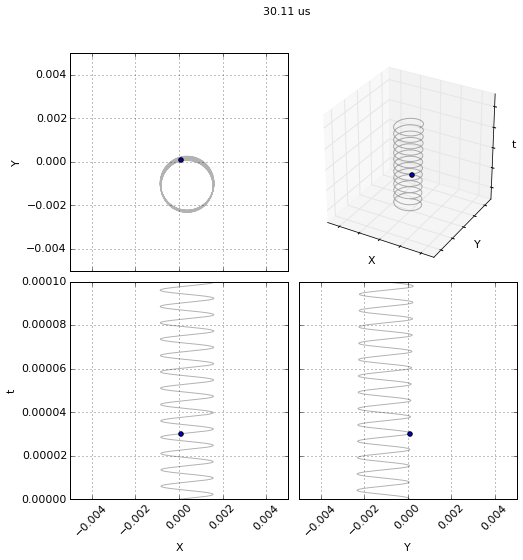

In [5]:
# ion in a magnetic field

t = np.linspace(0, 1e-4, 1e5)
dt = t[1]-t[0]

B = 2.
q = 1.6e-19
m = 230e-3/6.02e23

# intial velocity, direction
vxy = 1e3
vz = 800
alpha = np.pi*0.1

# position array
p = np.zeros([3, len(t)])  # (x, y, z), time step

# initial position
p[0, 0] = 0
p[1, 0] = 0
p[2, 0] = 0

# first time step
p[0, 1] = p[0, 0] + vxy*dt*np.cos(alpha)
p[1, 1] = p[1, 0] + vxy*dt*np.sin(alpha)
p[2, 1] = p[2, 0] + vz*dt

# second time step
p[0, 2] = ((q*B*dt)/m)*(p[1, 1]-p[1, 0]) + 2*p[0, 1] - p[0, 0]
p[1, 2] = ((q*B*dt)/m)*(p[0, 1]-p[0, 0]) + 2*p[1, 1] - p[1, 0]
p[2, 2] = p[2, 1] + vz*dt

# all subsequent time steps
for i in range(3, len(t)):
    p[0, i] = 3*p[0, i-1] - 3*p[0, i-2] + p[0, i-3] - (((q*B*dt)**2)/(m**2)) * (p[0, i-2]-p[0, i-3])
    p[1, i] = ((-q*B*dt)/m)*(p[0, i-1]-p[0, i-2]) + 2*p[1, i-1] - p[1, i-2]
    p[2, i] = p[2, i-1] + vz*dt

# the following generates an interactive plot using IPython's 'interact' functionality
# by changing the position of the slider you generate a new plot with a  new time point highlighted
# you may call this same method using your own 'p' arrays
# plot_limit controls the extent of the plot in space (x and y)

# plot 'interactively'
plot_limit = 0.005
interact(draw, i=(0, len(t)-1, 10))

##1a
Carefully examine the magnetic field simulation so you really understand the way it works. Modify the simulation so that it predicts the motion of an ion in a quadrupole. Assume an angular frequency of 3.0x10<sup>6</sup> radians per second (linear frequency of 477 kHz), an electrode radius of 8 mm, and an $r_0$ = 6.969 mm. The $U$ and $V$ voltages will be scanned together from 0 to 140 and 840 volts, respectively, to obtain mass spectra. Assume also that the ion is a positively, singly charged ion and it begins its motion at $x = y = z =$ 0.1 mm. Assume that the ion is traveling at 10<sup>3</sup> cm per second in the $x-y$ plane at an angle of $\frac{\pi}{10}$ to the $x$-axis and 8x10<sup>4</sup> cm per second in the $z$ plane.

##1b
Which electrodes are attached to the negative value of $U(t)$ and which electrodes are attached to the positive value of $U(t)$? Your choices are left and right or top and bottom. More importantly, explain the logic that led to that choice. If the logic isn't clear, refresh your memory by looking back at how we defined the motion of an ion in the quadrupole.

##1c
Show the ion trajectories for the following $a$ and $q$ values:

| $a$   | $q$   |
| ----- | ----- |
| 0.236 | 0.706 |
| 0.236 | 0.700 |
| 0.236 | 0.710 |

Which trajectories are stable and which are unstable?

##1d
The notes say that a quadrupole acts as a combination of a low mass pass filter and a high mass pass filter. Assuming the $U$ and $V$ voltages are the same for all three trajectories, which of the trajectories would correspond to the highest mass and which would correspond to the lightest mass? Determine which pair of electrodes would be hit by the heaviest mass and which would be hit by the lighter mass ion. Which pair is the high pass and which is the low mass pass?

##1e
What instrumental parameters are required to mass select an ion with 200 amu mass? Assume that you are operating at $a$ = 0.235 and $q$ = 0.706. Show the trajectory of the ion in the $x, y, z$ plane.

##1f
Determine the $a$ and $q$ values in the mass scan (i.e. $\frac{a}{q}$ = 0.3329) where the ion trajectory is unstable. From this information, determine the width of the peak, $\Delta m$, that corresponds to the resolution of the quadrupole.

##1g
Plot the trajectory for a stable ion in rf only mode. Compare it with the stable trajectories that you plotted in 1c.

##1h
Using the same $U$ and $V$ values required in problem 1e, determine the $a$ and $q$ values where the ion trajectory becomes unstable in the rf only mode. What mass corresponds to the instability point?

##2
A time of flight instrument is constructed by creating a plume of analyte molecules by focusing a 10 nanosecond pulsed laser on the sample's surface. Assume the plume is ~40 microns in size. The sample contains molecules with masses of 52, 254, 256, and 3258 amu. The molecules are both desorbed and ionized by the laser excitation. The plume is characterized by a temperature of 730 &deg;C. The sample surface is at ground potential and the accelerating electrode is at 2000 V. The accelerating electrode is 4 cm away from the sample surface. After leaving the accelerating region, the sample ions enter a 1.5 meter tube until they are detected by an electron multiplier. The electron multiplier has a response time of 20 nanoseconds.

Answer the following questions for each ion:

##2a
What is the time spent in the source region?

##2b
What is the time spent in the drift tube?

##2c
What is the spread of times expected from the difference in initial thermal energy?

##2d
What is the spread in times expected from the differences caused by different ionization positions?

##3
An FT-ICR mass spectrometer is constructed using a 6 Tesla magnet, a cubic cell with sides that are 4 cm, and a 10<sup>-10</sup> Torr vacuum pressure. We are interested in measuring a singly charged peptide with a molecular weight of 1121 amu.

##3a
Determine the linear and angular frequencies expected for this peptide.

##3b
If the ICR has 105 peptide ions, what is the radio frequency current that would be measured by the detection system?

##3c
If the peptide is at room temperature and its velocity corresponds to its average thermal velocity, what is the radius of its motion? Will this radius have an effect on the possible detection limits?

##3d
Determine the average length of time that the peptide will have before it collides with a gas molecule and determine the average number of periods that the molecule would rotate before colliding with another molecule. Assume the radius is constrained by the walls.

##3e
If we want to elminate this peptide by having it collide with the walls, what kinetic energy must be imparted to the peptide by the radio frequency excitation?

##3f
Two acetic acid molecules can have the same nominal mass but different isotipic substitutions. Consider <sup>12</sup>C<sub>2</sub><sup>1</sup>H<sub>4</sub><sup>16</sup>O<sup>17</sup>O and <sup>12</sup>C<sub>2</sub><sup>1</sup>H<sub>3</sub><sup>2</sup>H<sub>1</sub><sup>16</sup>O<sub>2</sub>. Both have a mass of 61 but their exact masses are different. They require a high resolution mass spectrometer to resolve them. What resolution would be required? What is the resolution of this FT-ICR instrument assuming the pressure is 10<sup>-10</sup> Torr? Would it resolve the two acetic acid molecules?